In [1]:
import sys, os
os.chdir("../source")
import SQcircuit as sq
import matplotlib.pyplot as plt
import numpy as np

## Inductively shunted superconducting circuits

<img src="pics/inductivelyShunted_pic1.png" width="300" />

<img src="pics/inductivelyShunted_pic2.png" width="350" />

In [2]:
loop1 = sq.Loop()

C_r = sq.Capacitor(20.3, "fF")
L_r = sq.Inductor (15.6, "nH")
C_q =  sq.Capacitor(5.3, "fF")
L_q = sq.Inductor(386, "nH", loops=[loop1])
JJ = sq.Junction(6.2, "GHz", loops=[loop1])
L_s =  sq.Inductor(4.5, "nH", loops=[loop1])

circuitElemetns = {(0, 1): [C_r],
                   (1, 2): [L_r],
                   (0, 2): [L_s],
                   (2, 3): [L_q],
                   (0, 3): [JJ,C_q]}

# cr is an object of Qcircuit
cr1 = sq.Circuit(circuitElemetns)

[9.81352192e+13 4.95852195e+10 2.19742125e+10]
[9.81352192e+13 4.95852195e+10 2.19742125e+10]


## Circuit Eigenvalues

In [3]:
# call this function to set the truncation number for each mode of the circuit. 
cr1.setTruncationNumbers([1,9,23])

numEig=10
phiExt = np.linspace(-0.1,0.6,100)*2*np.pi
eigenValues = np.zeros((numEig, len(phiExt)))
for i in range(len(phiExt)):
    loop1.setFlux(phiExt[i])
    eigenValues[:, i], _ = cr1.run(numEig)

(0.0, 18.0)

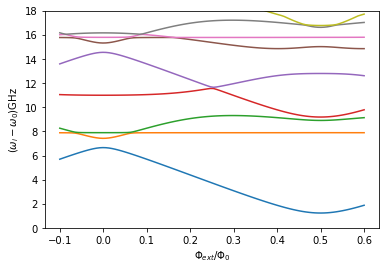

In [4]:
for i in range(1,numEig):
    plt.plot(phiExt/2/np.pi, eigenValues[i,:]- eigenValues[0,:])
plt.xlabel("$\Phi_{ext}/\Phi_0$")
plt.ylabel("($\omega_i-\omega_0$)GHz")
plt.ylim([0,18])

The next cell shows the spectrum from the figure 2 of the paper, which is the same spectrum that Qcircuit calculated.

<img src="pics/inductivelyShunted_pic3.png" width="380" align = "left" />